In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import math
from scipy.interpolate import interp1d
from IPython.core.pylabtools import figsize # import figsize
from scipy.interpolate import interp1d
#figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 400 #分辨率
from scipy.optimize import curve_fit

In [5]:
ERBand = uproot.open("../build/testPandaX4T.root")["ER_Band"]
NRBand = uproot.open("../build/testPandaX4T.root")["NR_Band"]

ER = ERBand.values()
NR = NRBand.values()
NR.shape

(800, 500)

In [6]:
# to get median and err

In [7]:
def gaus(x,a,x0,sigma):
    return a * np.exp(-(x-x0)**2/(2*sigma**2))

In [8]:
median = []
medianErr = []

for i in range(30, len(NR)):
    
    #median
    temp = NR[i,:]
    Sum = np.sum(temp)
    cums = np.cumsum(temp) / Sum
    f = interp1d(cums, range(1,501))
    value = f(0.5)
    #index = temp.tolist().index(min(temp, key=lambda x:abs(x-value)))
    median.append(value)
    
    #err of median
    popt, pcov = curve_fit(gaus,np.linspace(0.,500.,500), temp.tolist())
    sigma = abs(popt[2] * 1.2533 / np.sqrt(Sum))
    medianErr.append(sigma)

print(median)



[array(234.60562891), array(233.57325924), array(232.49750271), array(231.77627976), array(230.70534996), array(229.84492983), array(229.11970874), array(228.28040286), array(227.4832177), array(226.81760204), array(226.16556054), array(225.54775933), array(224.78835022), array(224.20502646), array(223.62540193), array(223.02546844), array(222.51062135), array(222.04599303), array(221.51006109), array(221.02285367), array(220.51192171), array(220.04701754), array(219.66929483), array(219.2753011), array(218.66459795), array(218.42198148), array(217.99760545), array(217.55079365), array(217.19747821), array(216.77979472), array(216.47142038), array(216.13116657), array(215.80783843), array(215.50823368), array(215.14084507), array(214.82769449), array(214.49691231), array(214.2774771), array(213.93794032), array(213.68619876), array(213.3056806), array(213.10310613), array(212.90659831), array(212.66314953), array(212.35673775), array(212.07297671), array(211.73847073), array(211.559654

# store the ER events in each S1

In [9]:
numER = []

for i in range(30, len(ER)):
    temp = ER[i,:]
    numER.append(np.sum(temp))
    


# randomly get median and do rejection

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
71.35998582839966


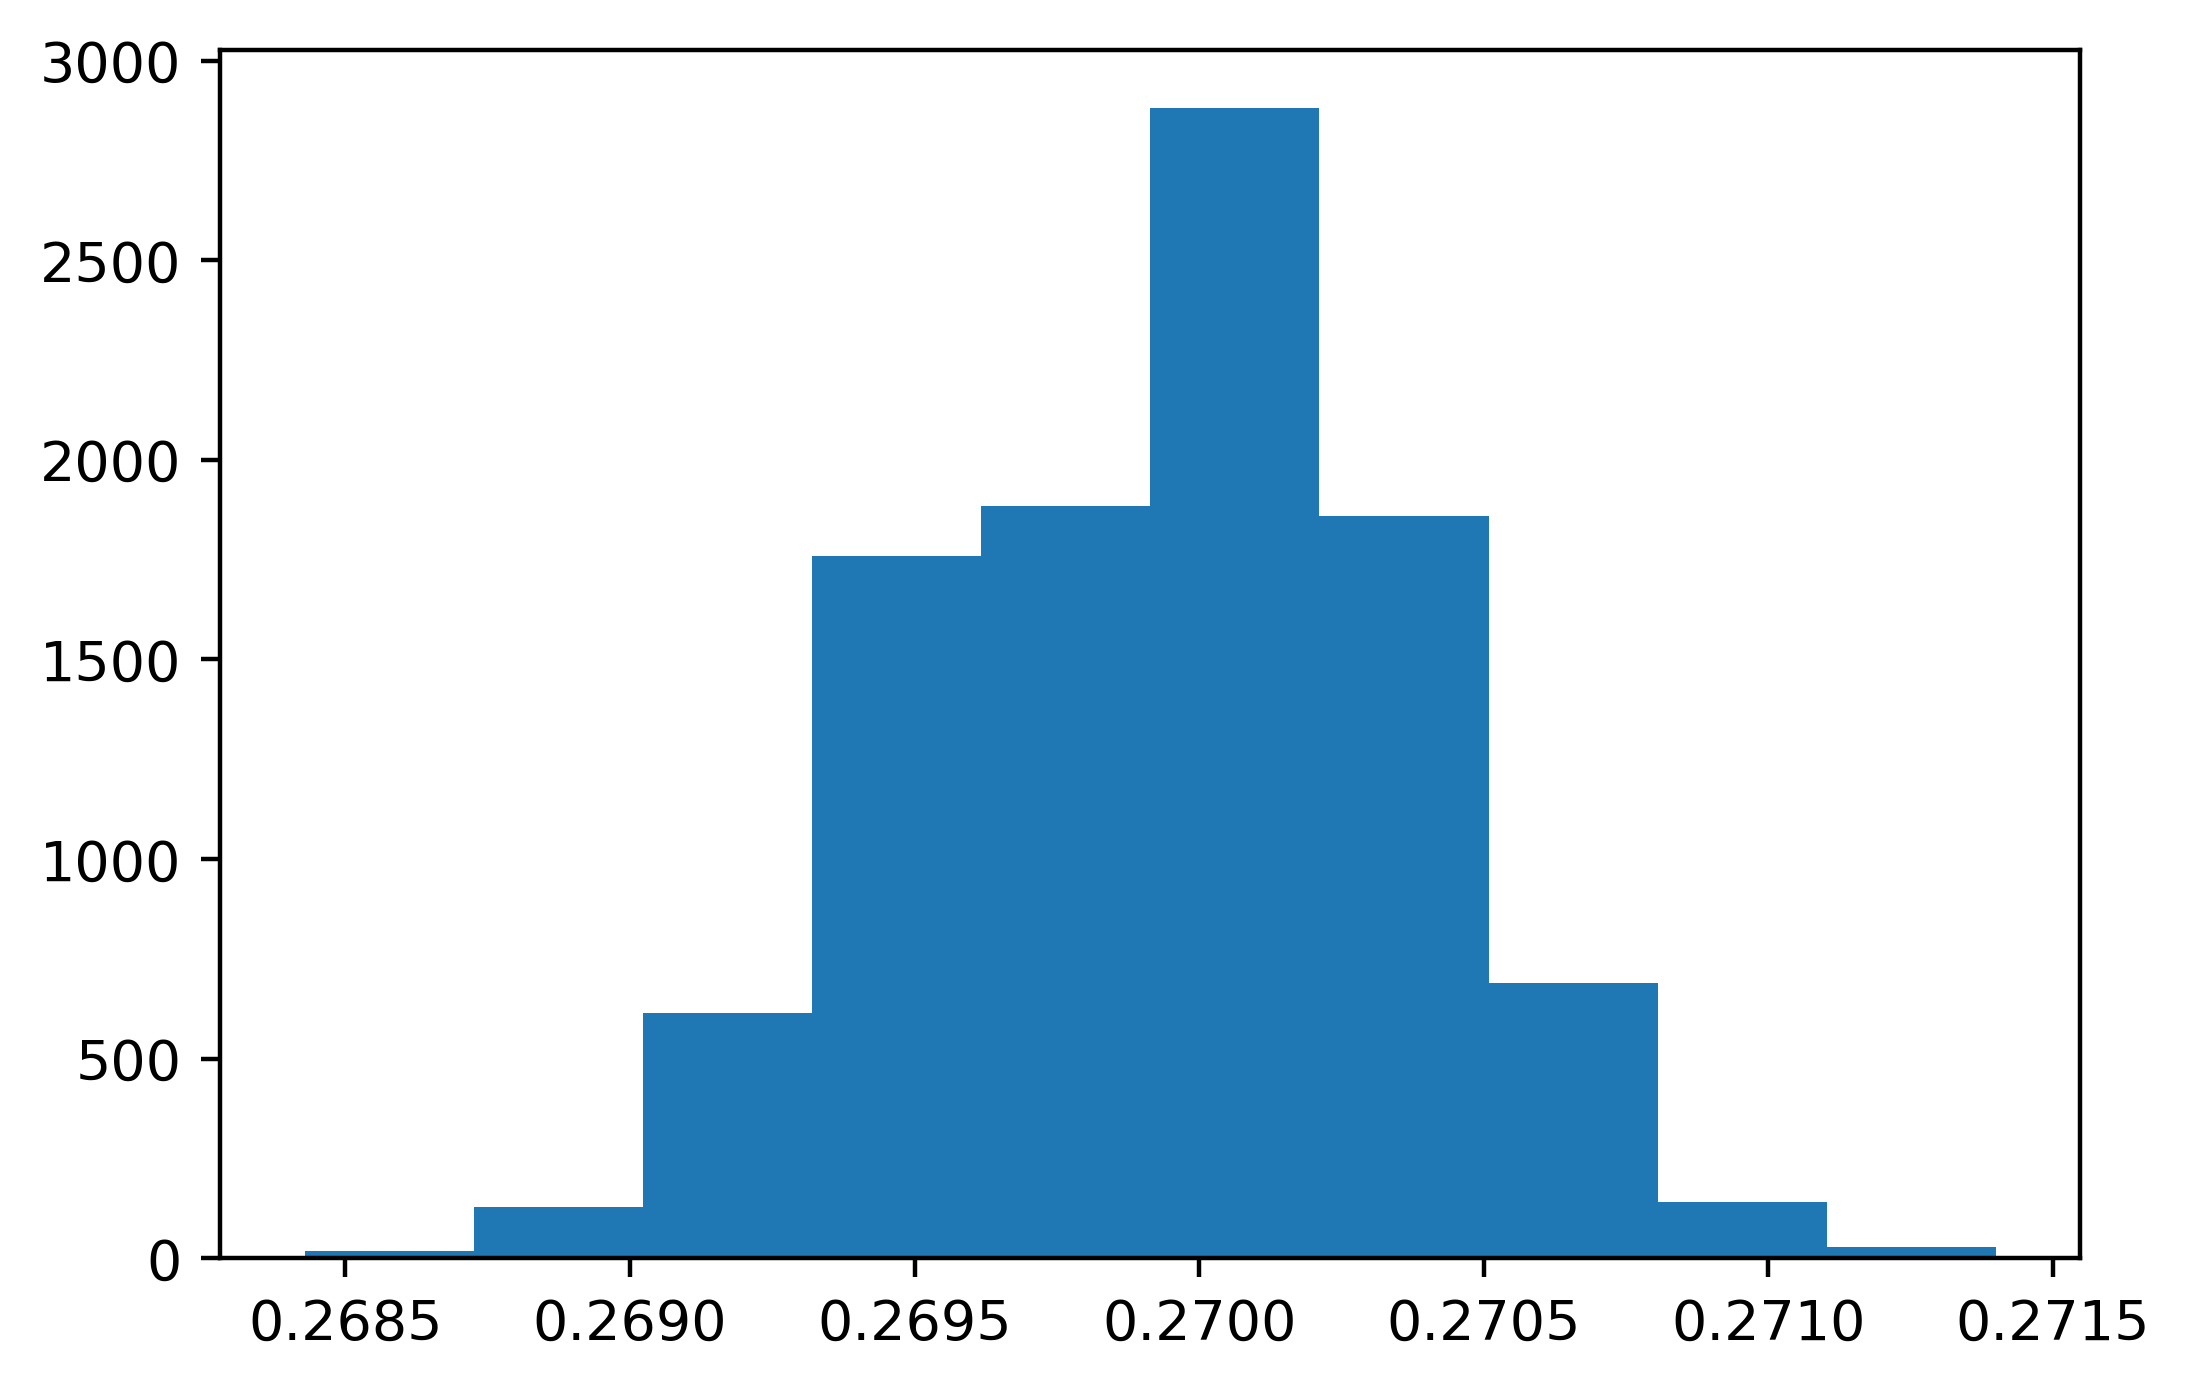

In [17]:
import time
startTime = time.time()
    
Nsim = 10000

lr = []
for i in range(Nsim):
    if i%1000==0:
        print(i)
    LR = []
    for j in range(30, len(ER)):
        index = j - 30
        Median = int(np.random.normal(median[index], medianErr[index]) + 0.5)
        temp = ER[j,:]
        Bin = int(Median + 1)
        LR.append(np.sum(temp[0:Bin])/numER[index])
    lr.append(np.sum([LR[k] * numER[k] for k in range(len(ER) - 30)])/np.sum(numER) * 100)
    
plt.hist(lr)
print(time.time() - startTime)
    
        

In [19]:
from scipy.stats import norm
mean,std=norm.fit(lr)
#meanErr,stdErr = norm.fit(lrErr)
print(mean)

0.26992514763581116


# to see the lr vs. s1

In [48]:
lr = []
lrErr = []
for i in range(30,len(NR)):
    temp = ER[i,:]
    LR = []
    LRErr = []
    index = i - 30
    for j in range(Nsim):
        LR.append(np.sum(temp[0:int(median[index] + 0.5)])/numER[index] * 100)
        LRErr.append(np.sqrt(np.sum(temp[0:int(median[index] + 0.5)]))/numER[index] * 100)
    mean,std = norm.fit(LR)
    Errmean,std = norm.fit(LRErr)
    lr.append(mean)
    lrErr.append(Errmean)


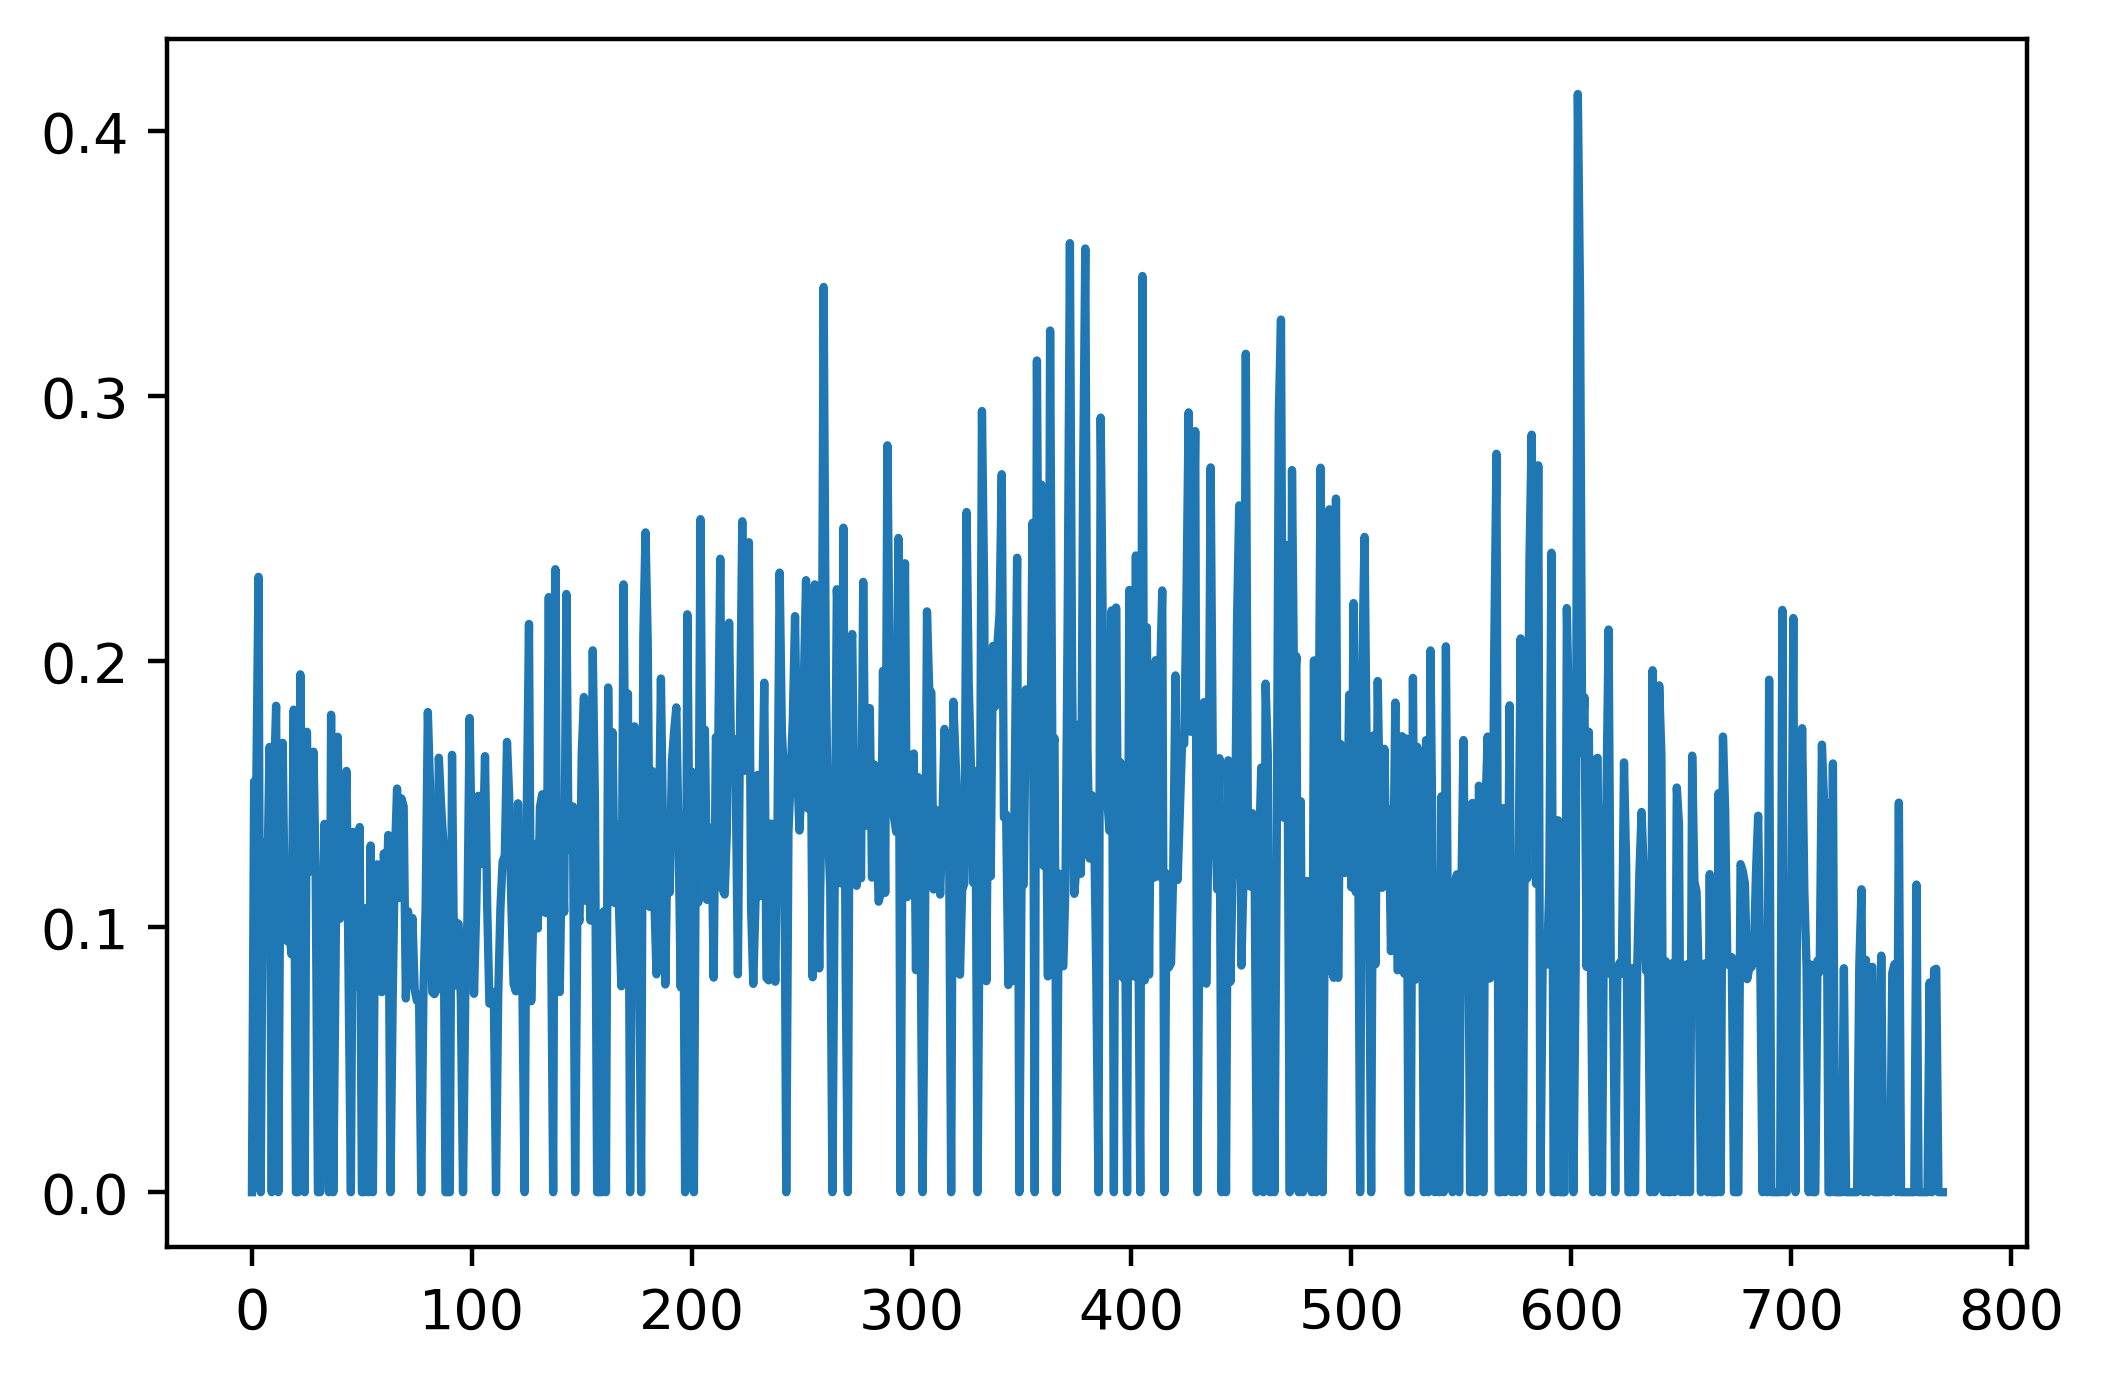

In [49]:
plt.plot(lrErr)

<ErrorbarContainer object of 3 artists>

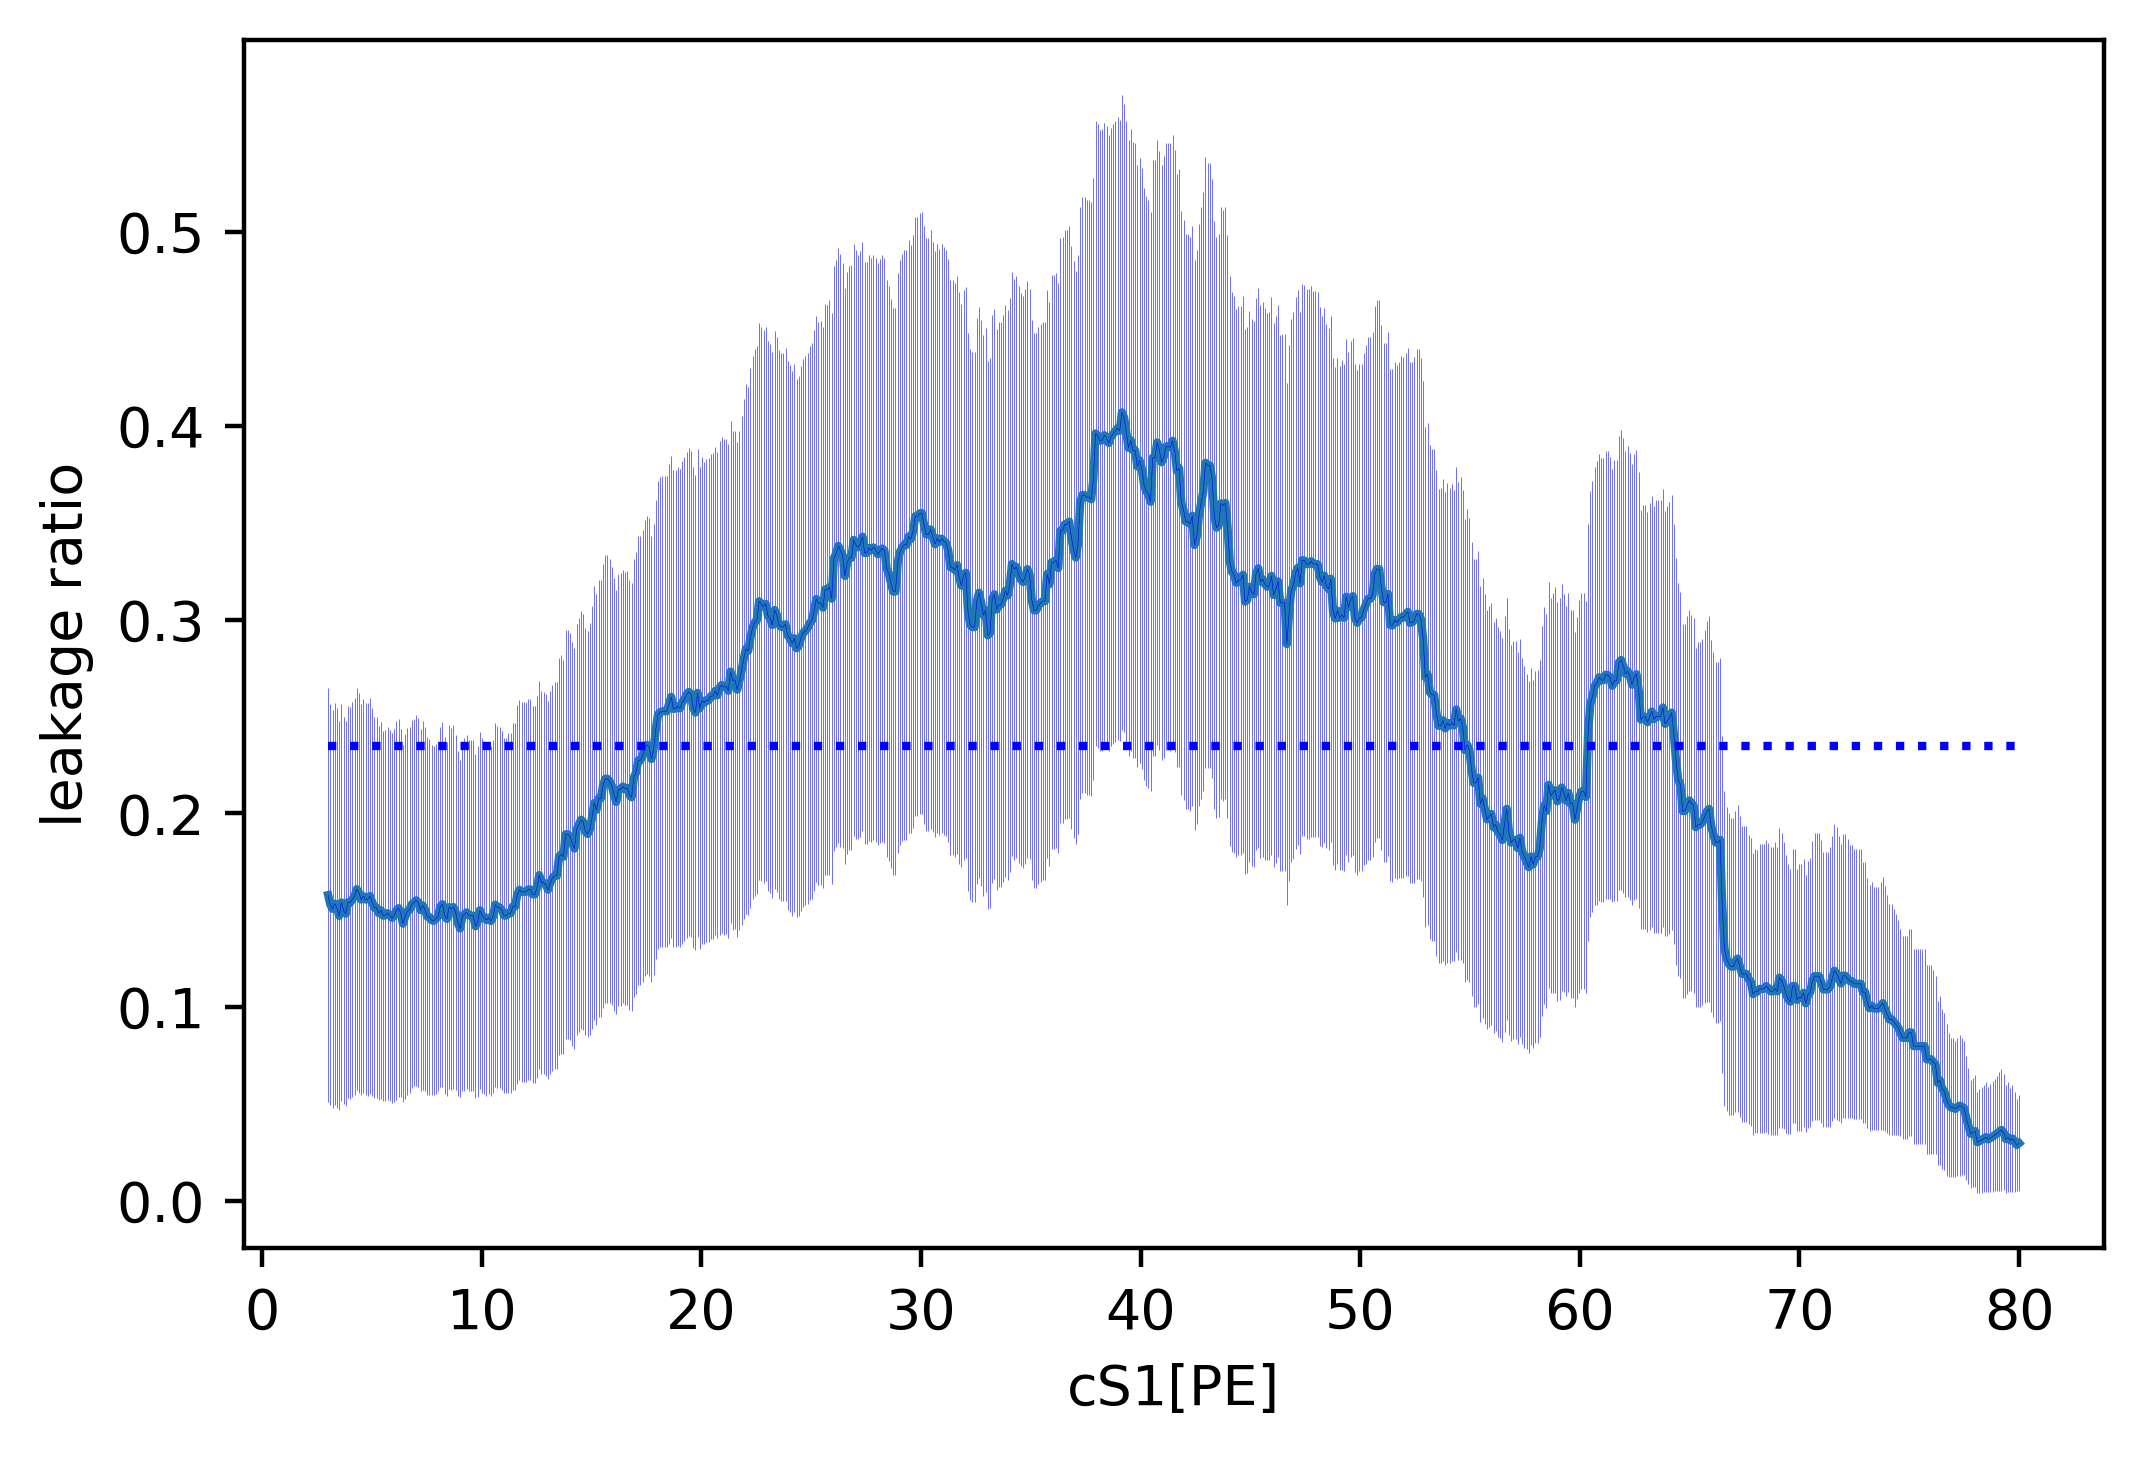

In [79]:
r = 30
lrSmooth = []
lrErrSmooth = []
for i in range(len(lr)):
    temp1=0.0
    temp2=0.0
    denominator=2*r+1
    for j in range(-r,r+1):
        if i+j<0. or i+j>769:
            temp1+=0
            denominator-=1
        else:
            temp1+=lr[i+j]
            temp2+=lrErr[i+j]
    temp1/=denominator
    temp2/=denominator
    lrSmooth.append(temp1)
    lrErrSmooth.append(temp2)
    
plt.plot(np.linspace(3,80,770),lrSmooth)
x_coordinates = [3, 80]
y_coordinates = [0.2346, 0.2346]
plt.xlabel("cS1[PE]")
plt.ylabel("leakage ratio")
plt.plot(x_coordinates, y_coordinates,linestyle = "dotted",color = "blue")
plt.errorbar(np.linspace(3,80,770), lrSmooth, yerr=lrErrSmooth,color='blue',linewidth = .1, capsize = 0, label = 'old')

In [142]:
array = [0,1,2,3]
array[0:2]

[0, 1]